<a href="https://colab.research.google.com/github/devLarissaRodrigues/WoMakersCode-DataAnalytics-DesafiosEmSquad/blob/main/Desafio3_completo_em_squad_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Squad: Mae C. Jemison

Integrantes:
*   Amparo Silvia Pastor Castillo Runschka
*   Cristiana Alves Moura
*   Fernanda Monello Correa Manoel
*   Larissa Monique de Sousa Rodrigues
*   Raquel Nunes Matos Rios
*   Vanelle Rabelo do Nascimento
*   Vanessa Lima Paraizo
*   Verônica Lima Costa


## Desafio 1: Entendendo o consumidor.
Suponha que você trabalha em uma empresa de streaming e, com as
mudanças no mercado, a equipe de marketing suspeita que o perfil dos
clientes que cancelaram a assinatura mudou. Eles pediram sua ajuda para
entender:

1.   Se o perfil dos clientes que cancelam hoje é diferente do perfil dos clientes que cancelaram anteriormente.
Dica: Fazer um comparativo dos clientes que cancelaram nos últimos 6
meses com os que cancelaram há mais de 24 meses.
2.   Quais são as principais diferenças entre os perfis, para que possam criar
estratégias mais eficazes de retenção.
Para isso, eles fornecem a base de dados clientes.csv, que contém
informações anonimizadas sobre os clientes ao longo do tempo.


###Importações das bibliotecas utilizadas:

[Data Set Clientes](https://docs.google.com/spreadsheets/d/12umlCuYSIC4gSiBwqn1JSI1Ey3I56yKHkc4Ni8bE3yg/edit?gid=1990017453#gid=1990017453)

[Canva da Apresentação](https://www.canva.com/design/DAGigNR1b2Q/rpeGuN1A2kFYUnMU9NP8Mg/edit)


In [ ]:
# Importando todas as bibliotecas utilizadas no desafio:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Estatística e testes de hipóteses
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import norm

# Cálculo de tamanho amostral
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_confint

###Inserção do dataset:

In [ ]:
# Configuração para melhor visualização dos gráficos
sns.set_theme(style="whitegrid")
plt.style.use("ggplot")

url = 'https://docs.google.com/spreadsheets/d/12umlCuYSIC4gSiBwqn1JSI1Ey3I56yKHkc4Ni8bE3yg/edit?gid=1990017453#gid=1990017453'
url = url.replace('/edit?gid=', '/export?format=csv&gid=')
df = pd.read_csv(url)

### Etapa de ETL - Extração, Transformação e Limpeza dos dados

In [ ]:
# Remover colunas desnecessárias
df = df.drop(columns=['cliente_id'])  # Exclui a coluna 'cliente_id', pois não é relevante para a análise

# Criar categorias de idade
#bins = [18, 30, 45, 60, 80]  # Define os intervalos das faixas etárias
#labels = ['18-29', '30-44', '45-59', '60+']  # Define os rótulos correspondentes para cada faixa etária
#df['faixa_etaria'] = pd.cut(df['idade'], bins=bins, labels=labels, right=False)# A função `pd.cut` categoriza a idade dos clientes com base nos intervalos definidos

# Criar métrica de engajamento
df['engajamento'] = df['frequencia_uso_mensal'] / df['tempo_assinatura_meses'] # Calcula o nível de engajamento do cliente, dividindo a frequência de uso mensal pelo tempo total de assinatura
# Quanto maior o valor, maior o engajamento do usuário com o serviço ao longo do tempo

# Converter a coluna 'cancelou' para tipo booleano (1 = cancelado, 0 = ativo)
df['cancelou'] = df['cancelou'].map({0: 1, 1: 0}).astype(int) # Agora 0 significa "Cancelado" e 1 significa "Ativo"

# Verificar as transformações
print(df.head(10))

# Salvar o dataset transformado
#df.to_csv('dados_transformados.csv', index=False)# Salva o DataFrame transformado em um arquivo CSV, sem incluir o índice, para análise posterior


   idade  tempo_assinatura_meses  frequencia_uso_mensal        regiao  \
0     56                      30                     27  Centro-Oeste   
1     69                      11                      2         Norte   
2     46                      58                     21           Sul   
3     32                      55                      1         Norte   
4     60                      28                     28           Sul   
5     25                      25                     15           Sul   
6     38                      39                      1      Nordeste   
7     56                      33                      5           Sul   
8     36                       1                     28       Sudeste   
9     40                      57                     29  Centro-Oeste   

   mensalidade  cancelou  engajamento  
0        96.03         0     0.900000  
1        91.22         1     0.181818  
2        56.45         1     0.362069  
3        69.61         1     0.01818

### Etapa 1: Análise de Distribuição e Perfis


* Analisar a distribuição de idade, tempo de assinatura, frequência de uso e região dos clientes que cancelaram nos últimos 6 meses e dos que cancelaram há mais de 24 meses.
*  Identificar e descrever as principais diferenças entre os perfis dos clientes nesses dois períodos.

In [ ]:
df.head()

,idade,tempo_assinatura_meses,frequencia_uso_mensal,regiao,mensalidade,cancelou,engajamento
0,56,30,27,Centro-Oeste,96.03,0,0.900000
1,69,11,2,Norte,91.22,1,0.181818
2,46,58,21,Sul,56.45,1,0.362069
3,32,55,1,Norte,69.61,1,0.018182
4,60,28,28,Sul,42.19,1,1.000000


In [ ]:
df.describe()

,idade,tempo_assinatura_meses,frequencia_uso_mensal,mensalidade,cancelou,engajamento
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,45.260000,30.890000,15.980000,59.129000,0.720000,1.468962
std,16.040852,17.679102,8.843679,23.318007,0.450126,3.334244
min,18.000000,1.000000,1.000000,21.160000,0.000000,0.018182
25%,31.750000,16.750000,8.000000,38.807500,0.000000,0.256944
50%,45.000000,32.000000,17.000000,57.710000,1.000000,0.500000
75%,59.000000,48.000000,23.000000,79.680000,1.000000,1.168478
max,74.000000,59.000000,29.000000,99.980000,1.000000,28.000000


In [ ]:
# Fazer uma cópia da base de dados com clientes que cancelaram nos ultimos 6 meses, deixando só as columnas que precisamos analisar
df_menor_6 = df[(df['tempo_assinatura_meses'] <= 6) & (df['cancelou'] == 1)].drop(columns=['mensalidade', 'cancelou','engajamento'])

df_menor_6.head(5)
df_menor_6.describe()

,idade,tempo_assinatura_meses,frequencia_uso_mensal
count,15.000000,15.000000,15.000000
mean,49.933333,3.133333,18.866667
std,16.485780,1.726543,6.151268
min,25.000000,1.000000,7.000000
25%,35.500000,2.000000,15.500000
50%,54.000000,3.000000,19.000000
75%,64.000000,4.500000,23.000000
max,72.000000,6.000000,28.000000


<Figure size 640x480 with 0 Axes>

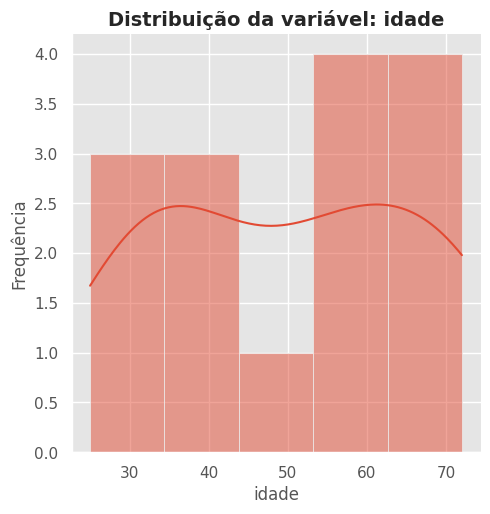

<Figure size 640x480 with 0 Axes>

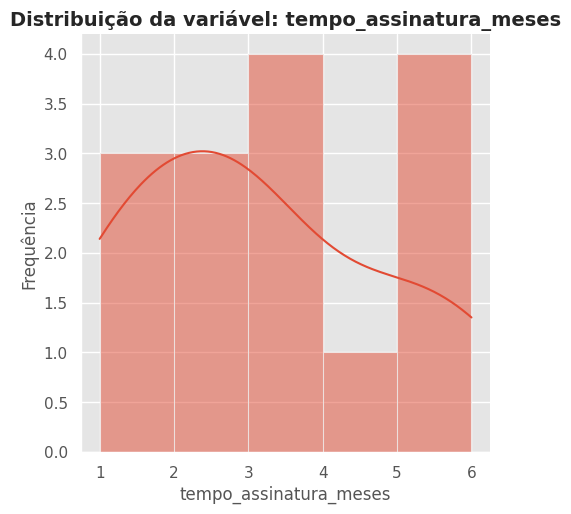

<Figure size 640x480 with 0 Axes>

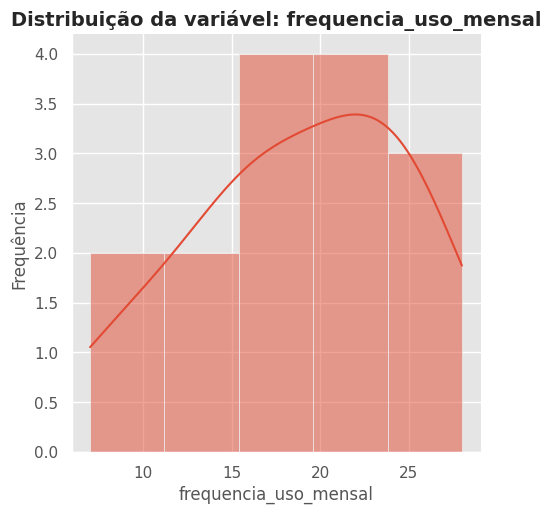

<Figure size 640x480 with 0 Axes>

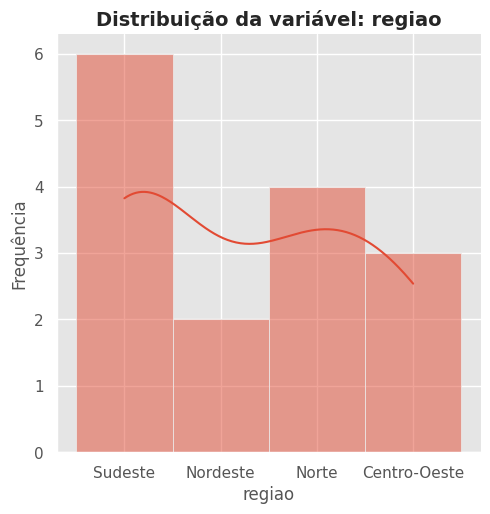

In [ ]:
# Criação do histograma para cada columna para ver a distribuição
# create distplots
for column in df_menor_6.columns:
    plt.figure()
    sns.displot(data = df_menor_6 , x = column, kde= True)


# Melhorando os detalhes visuais
    plt.title(f"Distribuição da variável: {column}", fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Frequência", fontsize=12)

    # Mostra o gráfico
    plt.show()

In [ ]:
# Cópia da base de dados com clientes que cancelaram com mais de 2 anos de assinatura, e deixando só as columnas que precisamos analisar
df_maior_24 = df[(df['tempo_assinatura_meses'] > 24) & (df['cancelou'] == 1)].drop(columns=['mensalidade', 'cancelou','engajamento'])

df_maior_24.head(5)
df_maior_24.describe()

,idade,tempo_assinatura_meses,frequencia_uso_mensal
count,92.000000,92.00000,92.000000
mean,44.097826,42.25000,14.934783
std,15.790566,10.32933,9.095107
min,18.000000,25.00000,1.000000
25%,31.000000,33.00000,6.750000
50%,43.000000,41.00000,16.000000
75%,57.500000,52.00000,22.000000
max,74.000000,59.00000,29.000000


<Figure size 640x480 with 0 Axes>

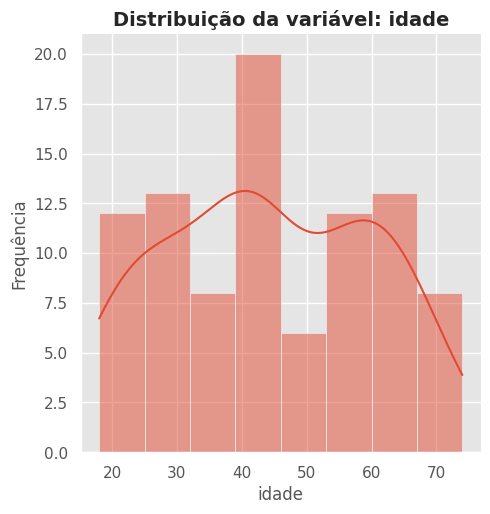

<Figure size 640x480 with 0 Axes>

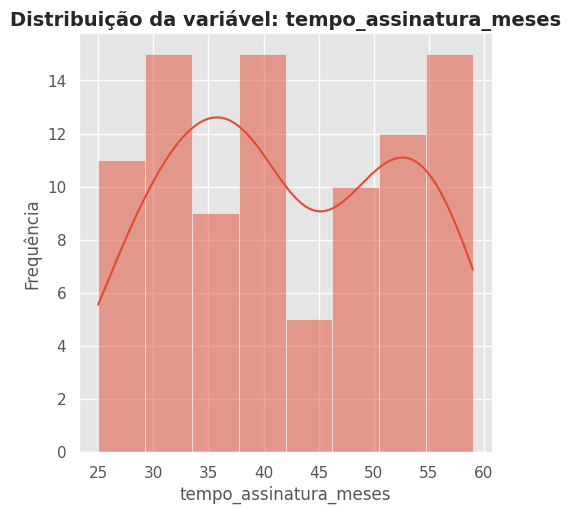

<Figure size 640x480 with 0 Axes>

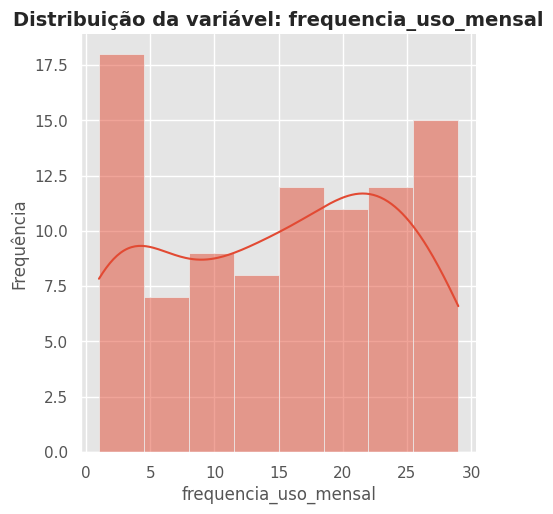

In [ ]:
# Histograma para cada columna para ver a distribuição

# create distplots
for column in df_maior_24.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.displot(data = df_maior_24 , x = column, kde= True)


# Melhorando os detalhes visuais
    plt.title(f"Distribuição da variável: {column}", fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Frequência", fontsize=12)

    # Mostra o gráfico
    plt.show()

### Etapa 2: Visualização de Dados

*   Criar gráficos para visualizar padrões dos clientes que mantêm e cancelam a assinatura (histogramas, boxplots, gráficos de dispersão).
*   Destacar insights visuais e possíveis tendências nos dados analisados.



<ipython-input-65-42728b80e7d7>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(["Manteve", "Cancelou"])


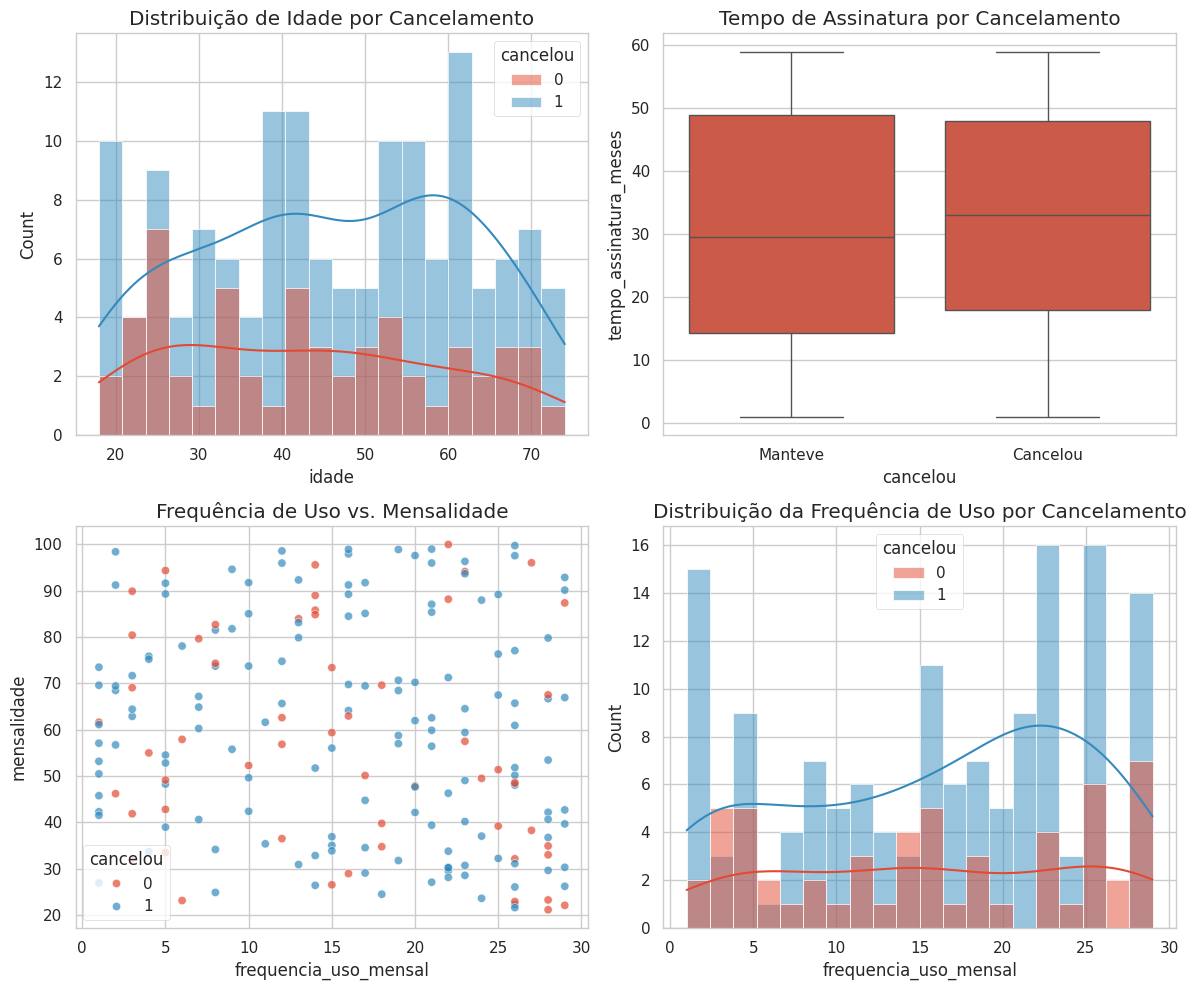

In [ ]:
# Configurar estilo dos gráficos
sns.set_style("whitegrid")

# Criar uma figura com múltiplos subgráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histograma da idade por cancelamento
sns.histplot(data=df, x="idade", hue="cancelou", bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribuição de Idade por Cancelamento")

# Boxplot do tempo de assinatura por cancelamento
sns.boxplot(data=df, x="cancelou", y="tempo_assinatura_meses", ax=axes[0, 1])
axes[0, 1].set_title("Tempo de Assinatura por Cancelamento")
axes[0, 1].set_xticklabels(["Manteve", "Cancelou"])

# Gráfico de dispersão: Frequência de uso vs. Mensalidade, colorido por cancelamento
sns.scatterplot(data=df, x="frequencia_uso_mensal", y="mensalidade", hue="cancelou", alpha=0.7, ax=axes[1, 0])
axes[1, 0].set_title("Frequência de Uso vs. Mensalidade")

# Histograma da frequência de uso mensal por cancelamento
sns.histplot(data=df, x="frequencia_uso_mensal", hue="cancelou", bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribuição da Frequência de Uso por Cancelamento")

# Ajustar layout
plt.tight_layout()
plt.show()

# **Principais Insights da etapa 2**


# 1️⃣ Distribuição de Idade por Cancelamento (Histograma)

**📊 O que podemos observar?**

A maior parte dos usuários está entre 20 e 70 anos .

Quem cancelou **(vermelho)** é distribuído ao longo de todas as idades, mas com menor concentração nas faixas mais jovens.

Quem manteve a assinatura **(azul)** tem picos em 30, 40 e 60 anos .

Tendência: Pode haver um comportamento diferente entre faixas etárias.


**📌 Possível insight :** Os usuários mais jovens parecem ter uma maior retenção, enquanto os mais velhos têm uma distribuição mais equilibrada entre cancelar e manter.

# 2️⃣ Tempo de Assinatura por Cancelamento (Boxplot)

**📊 O que podemos observar?**

Os usuários que cancelam têm um tempo de assinatura com distribuição muito semelhante ao de quem mantém.

A mediana **(linha no meio da caixa)** está próxima para ambos os grupos.

Existem outliers **(pontos individuais)** que indicam que alguns usuários permaneceram assinantes por longos períodos antes de cancelar .

📌 Possível insight : O tempo de assinatura não parece ser um fator decisivo no cancelamento. Outros fatores podem ser mais relevantes, como preço ou frequência de uso.

# 3️⃣ Frequência de Uso vs. Mensalidade (Gráfico de Dispersão)


**📊 O que podemos observar?**

A relação entre frequência de uso e mensalidade parece bem dispersa.

Tanto os usuários que pagam mensalidades altas quanto os que pagam valores baixos têm variações na frequência de uso.

O grupo que cancela **(vermelho)** é distribuído de maneira semelhante ao grupo que manteve a assinatura **(azul)**.

📌 Possível insight : O preço pode não ser um fator determinante para o cancelamento. Os usuários podem cancelar independentemente do valor da mensalidade.



# 4️⃣ Distribuição da Frequência de Uso por Cancelamento (Histograma)

**📊 O que podemos observar?**

A maioria dos usuários tem frequência de uso abaixo de 10 interações por mês .

Usuários que mantêm assinatura **(azul)** têm picos de uso mais elevados.

Os usuários que cancelam **(vermelho)** são mais distribuídos e aparentemente têm menor frequência de uso.

📌 Possível insight : A frequência de uso pode ser um fator-chave no cancelamento . Usuários que utilizam pouco o serviço tendem a cancelar mais.

# **📢 Conclusões Finais**

🔹 Frequência de uso parece ser um fator relevante no cancelamento.

🔹 Preço da mensalidade não tem uma relação direta com retenção ou cancelamento.

🔹 Usuários mais velhos têm maior variação de comportamento.

🔹 Tempo de assinatura não impacta diretamente a decisão de cancelar.

### Etapa 3: Análise de Distribuição e Perfis


* Aplicar testes estatísticos (ex.: teste qui-quadrado, teste t, regressão logística) para verificar se há relação significativa entre o tempo de assinatura e a taxa de cancelamento.
* Interpretar os resultados e explicar o impacto desses achados na retenção de clientes.

### Definir a hipótese do teste

Queremos testar se o tempo de assinatura influencia o cancelamento.

Hipótese nula (H₀): O tempo de assinatura não tem relação significativa com o cancelamento.

Hipótese alternativa (H₁): O tempo de assinatura tem relação significativa com o cancelamento.

In [ ]:
# Implementação do código referente à etapa 3:
# Teste t de Student (se o tempo de assinatura dos cancelados e dos ativos for normalmente distribuído)

from scipy.stats import ttest_ind

# Separar os grupos
tempo_ativos = df[df["cancelou"] == 0]["tempo_assinatura_meses"]
tempo_cancelados = df[df["cancelou"] == 1]["tempo_assinatura_meses"]

# Teste t
t_stat, p_value = ttest_ind(tempo_ativos, tempo_cancelados, equal_var=False)

print(f"Teste t de Student:")
print(f"Estatística t = {t_stat:.4f}")
print(f"Valor p = {p_value:.4f}")

# Interpretar o resultado
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos H₀: O tempo de assinatura tem relação significativa com o cancelamento.")
else:
    print("Não rejeitamos H₀: Não há evidências suficientes para afirmar que o tempo de assinatura influencia o cancelamento.")



Teste t de Student:
Estatística t = -0.5900
Valor p = 0.5566
Não rejeitamos H₀: Não há evidências suficientes para afirmar que o tempo de assinatura influencia o cancelamento.


In [ ]:
#Teste de Mann-Whitney (se os dados não forem normalmente distribuídos)

from scipy.stats import mannwhitneyu

# Teste de Mann-Whitney
u_stat, p_value_mw = mannwhitneyu(tempo_ativos, tempo_cancelados, alternative="two-sided")

print(f"\nTeste de Mann-Whitney:")
print(f"Estatística U = {u_stat:.4f}")
print(f"Valor p = {p_value_mw:.4f}")

if p_value_mw < alpha:
    print("Rejeitamos H₀: O tempo de assinatura tem relação significativa com o cancelamento.")
else:
    print("Não rejeitamos H₀: Não há evidências suficientes para afirmar que o tempo de assinatura influencia o cancelamento.")



Teste de Mann-Whitney:
Estatística U = 3799.5000
Valor p = 0.5278
Não rejeitamos H₀: Não há evidências suficientes para afirmar que o tempo de assinatura influencia o cancelamento.


In [ ]:
#Regressão Logística (para medir o impacto do tempo de assinatura na probabilidade de cancelamento).

import statsmodels.api as sm

# Definir variável dependente (y) e independente (X)
X = df["tempo_assinatura_meses"]
y = df["cancelou"]

# Adicionar uma constante para a regressão
X = sm.add_constant(X)

# Criar o modelo logístico
modelo = sm.Logit(y, X)
resultado = modelo.fit()

# Exibir os resultados
print(resultado.summary())

Optimization terminated successfully.
         Current function value: 0.592009
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               cancelou   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Tue, 25 Mar 2025   Pseudo R-squ.:                0.001593
Time:                        01:06:48   Log-Likelihood:                -118.40
converged:                       True   LL-Null:                       -118.59
Covariance Type:            nonrobust   LLR p-value:                    0.5388
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.7770      0.312      2.490      0.013       0.165      

Interpretação do coeficiente do tempo de assinatura

O coeficiente 0.0055 indica que quanto maior o tempo de assinatura, menor a probabilidade de cancelamento.

Mas o p-value = 0.539 significa que essa relação não é estatisticamente significativa.

📌 O tempo de assinatura, isoladamente, não tem um impacto estatisticamente significativo sobre o cancelamento (p > 0.05).

In [ ]:
# Testes com outras variáveis, como: tempo de assinatura. frequência de uso, mensalidade e região
import pandas as pd
import statsmodels.api as sm

# Garantir que a variável 'regiao' seja numérica
df["regiao"] = df["regiao"].astype("category").cat.codes

# Definir variáveis independentes e dependentes
X = df[["tempo_assinatura_meses", "frequencia_uso_mensal", "mensalidade", "regiao"]]
y = df["cancelou"].astype(int)  # Garantir que 'cancelou' seja numérico

# Adicionar constante para a regressão
X = sm.add_constant(X)

# Criar o modelo logístico
modelo = sm.Logit(y, X)
resultado = modelo.fit()

# Criar uma tabela formatada dos resultados
tabela_resultados = pd.DataFrame({
    "Variável": X.columns,
    "Coeficiente": resultado.params.round(4),
    "Erro Padrão": resultado.bse.round(4),
    "z-valor": resultado.tvalues.round(4),
    "p-valor": resultado.pvalues.round(4)
})

# Exibir a tabela formatada
from IPython.display import display

print("Resultados da Regressão Logística:")
display(tabela_resultados)

Optimization terminated successfully.
         Current function value: 0.589282
         Iterations 5
Resultados da Regressão Logística:


,Variável,Coeficiente,Erro Padrão,z-valor,p-valor
const,const,0.2241,0.6546,0.3424,0.7321
tempo_assinatura_meses,tempo_assinatura_meses,0.0057,0.0090,0.6343,0.5259
frequencia_uso_mensal,frequencia_uso_mensal,0.0086,0.0182,0.4745,0.6351
mensalidade,mensalidade,0.0045,0.0070,0.6468,0.5177
regiao,regiao,0.0768,0.1123,0.6833,0.4944


#Analisando os p-valores

Nenhuma das variáveis tem p < 0.05, o que significa que nenhuma delas tem um impacto estatisticamente significativo no cancelamento dentro desse modelo.

O tempo de assinatura tem um coeficiente negativo, sugerindo que quanto maior o tempo de assinatura, menor a chance de cancelamento, mas essa relação não é estatisticamente relevante (p = 0.6690).

A frequência de uso e a mensalidade também não apresentam impacto significativo no cancelamento.

* O tempo de assinatura, a frequência de uso, a mensalidade e a região não explicam bem o cancelamento.
* É provável que existam outros fatores importantes que influenciam a decisão de cancelar, como satisfação do cliente, qualidade do serviço, concorrência ou promoções.

### Etapa 4: Análise de Distribuição e Perfis


* Calcular o tamanho da amostra necessária para obter conclusões com 95% de confiança e 2% de margem de erro. Verificar se a base informada é suficiente.
*  Repetir o cálculo para uma margem de erro de 10% e comparar os resultados com a amostra disponível.

=== PARÂMETROS UTILIZADOS ===
Nível de confiança: 95.0%
Margem de erro: 2.0%
Tamanho da população: 100000
Proporção estimada de cancelamentos: 72.00%
Z-score correspondente ao nível de confiança: 1.9600
Tamanho da amostra inicial sem correção para população finita: 1936.10
Tamanho da amostra final corrigido para população finita: 1900
=== RESULTADOS ===
Tamanho da amostra necessário: 1900
A base informada contém 100000 registros.
A base informada é suficiente? Sim


<ipython-input-67-bf5babd8fd86>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["cancelou"], palette="viridis", ax=axes[0])


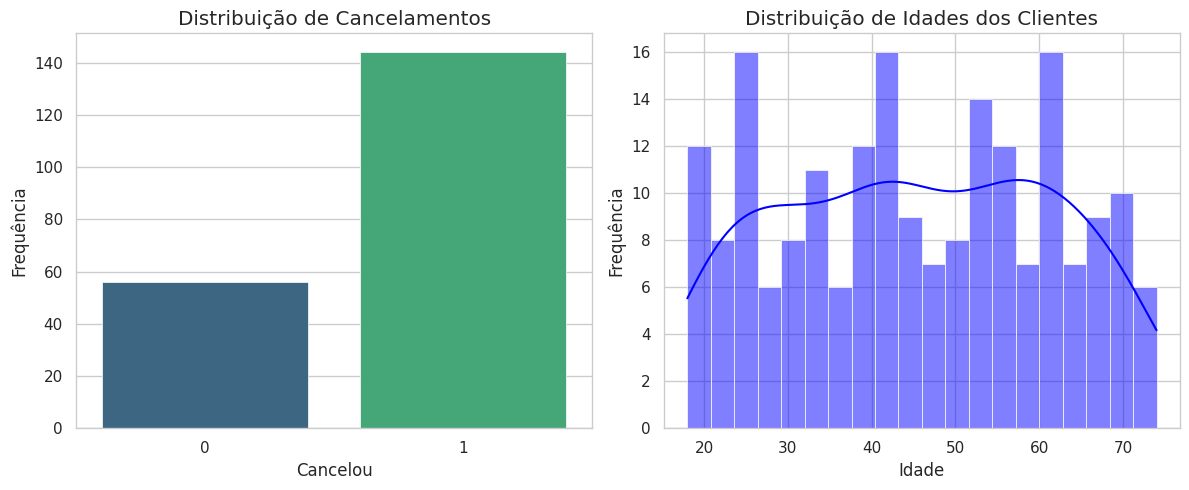

In [ ]:
# Task 7:
# Definir parâmetros para o cálculo do tamanho da amostra
conf_level = 0.95  # Nível de confiança (95%)
margin_of_error = 0.02  # Margem de erro (2%)
population_size = 100000  # Tamanho total da população

# Estimar proporção populacional a partir da variável "cancelou"
p_hat = df["cancelou"].mean()

# Calcular o Z-score para o nível de confiança desejado
z_score = norm.ppf(1 - (1 - conf_level) / 2)

# Exibir os valores usados nos cálculos
print("=== PARÂMETROS UTILIZADOS ===")
print(f"Nível de confiança: {conf_level * 100}%")
print(f"Margem de erro: {margin_of_error * 100}%")
print(f"Tamanho da população: {population_size}")
print(f"Proporção estimada de cancelamentos: {p_hat:.2%}")
print(f"Z-score correspondente ao nível de confiança: {z_score:.4f}")

# Calcular tamanho da amostra necessário usando a fórmula para proporções
sample_size = (z_score**2 * p_hat * (1 - p_hat)) / (margin_of_error**2)
print(f"Tamanho da amostra inicial sem correção para população finita: {sample_size:.2f}")

# Aplicar correção para população finita
sample_size = sample_size / (1 + (sample_size - 1) / population_size)
sample_size = int(np.ceil(sample_size))
print(f"Tamanho da amostra final corrigido para população finita: {sample_size}")

# Verificar se a base informada é suficiente
is_sufficient = population_size >= sample_size

# Exibir resultados detalhados
print("=== RESULTADOS ===")
print(f"Tamanho da amostra necessário: {sample_size}")
print(f"A base informada contém {population_size} registros.")
print(f"A base informada é suficiente? {'Sim' if is_sufficient else 'Não'}")

# Criar gráficos lado a lado
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico da distribuição da variável "cancelou"
sns.countplot(x=df["cancelou"], palette="viridis", ax=axes[0])
axes[0].set_xlabel("Cancelou")
axes[0].set_ylabel("Frequência")
axes[0].set_title("Distribuição de Cancelamentos")

# Gráfico de barras para a distribuição da idade
sns.histplot(df["idade"], bins=20, kde=True, color="blue", ax=axes[1])
axes[1].set_xlabel("Idade")
axes[1].set_ylabel("Frequência")
axes[1].set_title("Distribuição de Idades dos Clientes")

plt.tight_layout()
plt.show()

# Melhorando os gráficos
#sns.set_style("whitegrid")
#fig, ax = plt.subplots(figsize=(8, 5))

# Gráfico de barras mostrando o tamanho necessário da amostra para cada margem de erro
# sns.barplot(x=[f"Erro {m*100}%" for m in margin_of_errors], y=list(sample_sizes.values()), palette="coolwarm", ax=ax)
# ax.set_xlabel("Margem de Erro")
# ax.set_ylabel("Tamanho da Amostra Necessário")
# ax.set_title("Tamanho da Amostra para Diferentes Margens de Erro")

# Exibir valores nos gráficos
# for i, v in enumerate(sample_sizes.values()):
  #  ax.text(i, v + 100, str(v), ha='center', fontsize=12)

#plt.show()


In [ ]:
# Task 8:
# Repetir o cálculo para uma margem de erro de 10% e comparar os resultados com a amostra disponível.